In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# 5. Multi-class classification

## Softmax function

$$
softmax(\boldsymbol{x})_i = \frac{\exp(x_i)}{\sum_{j=1}^{n} \exp(x_j)} (i = 1, 2, \ldots, n)
$$

In [33]:
def softmax_vec(X):
    exp = np.exp(X)
    return exp / np.sum(exp, axis=1).reshape(X.shape[0], 1)

In [39]:
np.sum(softmax_vec(data), axis=1)

[[   2.71828183    7.3890561     1.        ]
 [   1.34985881  148.4131591     7.3890561 ]]
[  11.10733793  157.15207401]


array([ 1.,  1.])

## Generating Data

In [15]:
pointsA = np.random.randn(50, 2) + np.array([2, 2])
labelsA = np.array([[1, 0, 0] for _ in range(50)])

In [16]:
# print(pointsA)
# print(labelsA)

In [25]:
pointsB = np.random.randn(50, 2) + np.array([-4, 2])
labelsB = np.array([[0, 1, 0] for _ in range(50)])
pointsC = np.random.randn(50, 2) + np.array([0, -4])
labelsC = np.array([[0, 0, 1] for _ in range(50)])

In [26]:
points = np.vstack([pointsA, pointsB, pointsC])
labels = np.vstack([labelsA, labelsB, labelsC])

In [27]:
#print(points)
# print(labels)

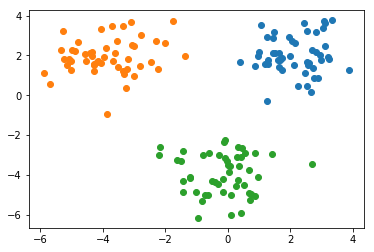

In [28]:
plt.plot(pointsA[:, 0], pointsA[:, 1], 'o')
plt.plot(pointsB[:, 0], pointsB[:, 1], 'o')
plt.plot(pointsC[:, 0], pointsC[:, 1], 'o')
plt.show()

In [29]:
def compute_vec(X):
    wx_1 = np.random.rand()
    wy_1 = np.random.rand()
    wx_2 = np.random.rand()
    wy_2 = np.random.rand()
    wx_3 = np.random.rand()
    wy_3 = np.random.rand()
    wb_1 = np.random.rand()
    wb_2 = np.random.rand()
    wb_3 = np.random.rand()
    
    W = np.array([
        [wx_1, wy_1],
        [wx_2, wy_2],
        [wx_3, wy_3]
    ])
    b = [wb_1, wb_2, wb_3]
    
    return np.dot(X, W.T) + b

In [30]:
def prob(X, param):
    wx_1 = param['wx_1']
    wy_1 = param['wy_1']
    wx_2 = param['wx_2']
    wy_2 = param['wy_2']
    wx_3 = param['wx_3']
    wy_3 = param['wy_3']
    wb_1 = param['wb_1']
    wb_2 = param['wb_2']
    wb_3 = param['wb_3']
    
    W = np.array([
        [wx_1, wy_1],
        [wx_2, wy_2],
        [wx_3, wy_3]
    ])
    b = [wb_1, wb_2, wb_3]
    
    return softmax_vec(np.dot(X, W.T) + b)

In [39]:
param = {}
param['wx_1'] = np.random.rand()
param['wy_1'] = np.random.rand()
param['wx_2'] = np.random.rand()
param['wy_2'] = np.random.rand()
param['wx_3'] = np.random.rand()
param['wy_3'] = np.random.rand()
param['wb_1'] = np.random.rand()
param['wb_2'] = np.random.rand()
param['wb_3'] = np.random.rand()

In [40]:
prob(points, param)

array([[ 0.25660257,  0.13903783,  0.60435961],
       [ 0.45508142,  0.13650128,  0.4084173 ],
       [ 0.3634823 ,  0.16146126,  0.47505644],
       [ 0.26566568,  0.08442778,  0.64990654],
       [ 0.27319704,  0.09627759,  0.63052537],
       [ 0.47337015,  0.16061279,  0.36601707],
       [ 0.54008003,  0.05916654,  0.40075343],
       [ 0.31181869,  0.08836261,  0.5998187 ],
       [ 0.25894454,  0.11884475,  0.62221071],
       [ 0.29763562,  0.11470979,  0.58765459],
       [ 0.57487743,  0.07572944,  0.34939313],
       [ 0.48475925,  0.04904792,  0.46619282],
       [ 0.52192223,  0.11721942,  0.36085835],
       [ 0.20567158,  0.18434605,  0.60998237],
       [ 0.50684385,  0.04330634,  0.44984981],
       [ 0.44448532,  0.13411546,  0.42139922],
       [ 0.52967025,  0.04108737,  0.42924239],
       [ 0.76547306,  0.05692177,  0.17760517],
       [ 0.50799665,  0.08326901,  0.40873434],
       [ 0.5944545 ,  0.12294433,  0.28260117],
       [ 0.58544109,  0.16928721,  0.245

In [41]:
np.log(prob(points, param))

array([[-1.36022682, -1.97300925, -0.50358588],
       [-0.78727894, -1.99142128, -0.89546583],
       [-1.01202467, -1.82349004, -0.74432167],
       [-1.3255166 , -2.47185874, -0.43092672],
       [-1.29756198, -2.34051968, -0.46120189],
       [-0.74787764, -1.82875887, -1.00507531],
       [-0.61603795, -2.82739918, -0.91440892],
       [-1.16533338, -2.42630638, -0.51112783],
       [-1.35114136, -2.12993728, -0.47447648],
       [-1.2118853 , -2.16534991, -0.53161593],
       [-0.55359842, -2.58058828, -1.05155755],
       [-0.72410289, -3.0149574 , -0.76315595],
       [-0.65023668, -2.14370775, -1.01926977],
       [-1.58147465, -1.6909406 , -0.49432522],
       [-0.67955231, -3.1394563 , -0.7988415 ],
       [-0.81083825, -2.00905417, -0.86417464],
       [-0.63550064, -3.19205453, -0.84573352],
       [-0.26726125, -2.86607749, -1.72819233],
       [-0.67728043, -2.48567879, -0.89468988],
       [-0.5201111 , -2.0960236 , -1.26371868],
       [-0.53538971, -1.77615852, -1.405

In [42]:
np.log(prob(points, param)) * labels

array([[-1.36022682, -0.        , -0.        ],
       [-0.78727894, -0.        , -0.        ],
       [-1.01202467, -0.        , -0.        ],
       [-1.3255166 , -0.        , -0.        ],
       [-1.29756198, -0.        , -0.        ],
       [-0.74787764, -0.        , -0.        ],
       [-0.61603795, -0.        , -0.        ],
       [-1.16533338, -0.        , -0.        ],
       [-1.35114136, -0.        , -0.        ],
       [-1.2118853 , -0.        , -0.        ],
       [-0.55359842, -0.        , -0.        ],
       [-0.72410289, -0.        , -0.        ],
       [-0.65023668, -0.        , -0.        ],
       [-1.58147465, -0.        , -0.        ],
       [-0.67955231, -0.        , -0.        ],
       [-0.81083825, -0.        , -0.        ],
       [-0.63550064, -0.        , -0.        ],
       [-0.26726125, -0.        , -0.        ],
       [-0.67728043, -0.        , -0.        ],
       [-0.5201111 , -0.        , -0.        ],
       [-0.53538971, -0.        , -0.   

In [43]:
-np.mean(np.log(prob(points, param)) * labels)

0.49905441579268106

In [44]:
# Answer
np.argmax(np.log(prob(points, param)), axis=1)

array([2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1])

In [45]:
def gradient(variables, variable_name, labels, points):
    h = 1e-4
    input2 = variables.copy()
    input2[variable_name] += h
    
    input1 = variables.copy()
    input1[variable_name] -= h
    
#     print(input1, input2)
    
    z2 = -np.mean(np.log(prob(points, input2)) * labels)
    z1 = -np.mean(np.log(prob(points, input1)) * labels)
#     print(z1, z2)
    
    delta_z = z2 - z1
    delta_x = h * 2
    return delta_z / delta_x

In [46]:
gradient(param, 'wx_1', labels, points)

-0.51002070134753552

In [48]:
ETA = 0.01

for iteration in range(1000):
#     sets_, labels_ = shuffle(sets, labels)
    
#     for (current_point, current_label) in zip(sets_, labels_):        
    grad = {
        'wx_1': gradient(param, 'wx_1', labels, points),
        'wy_1': gradient(param, 'wy_1', labels, points),
        'wx_2': gradient(param, 'wx_2', labels, points),
        'wy_2': gradient(param, 'wy_2', labels, points),
        'wx_3': gradient(param, 'wx_3', labels, points),
        'wy_3': gradient(param, 'wy_3', labels, points),
        'wb_1': gradient(param, 'wb_1', labels, points),
        'wb_2': gradient(param, 'wb_2', labels, points),
        'wb_3': gradient(param, 'wb_3', labels, points),
    }

    param['wx_1'] = param['wx_1'] - ETA * grad['wx_1']
    param['wy_1'] = param['wy_1'] - ETA * grad['wy_1']
    param['wx_2'] = param['wx_2'] - ETA * grad['wx_2']
    param['wy_2'] = param['wy_2'] - ETA * grad['wy_2']
    param['wx_3'] = param['wx_3'] - ETA * grad['wx_3']
    param['wy_3'] = param['wy_3'] - ETA * grad['wy_3']
    param['wb_1'] = param['wb_1'] - ETA * grad['wb_1']
    param['wb_2'] = param['wb_2'] - ETA * grad['wb_2']
    param['wb_3'] = param['wb_3'] - ETA * grad['wb_3']


    function_output = -np.mean(np.log(prob(points, param)) * labels)
    print("iteration: {}, output: {}".format(iteration, function_output))

iteration: 0, output: 0.4906364411667768
iteration: 1, output: 0.48234742557519034
iteration: 2, output: 0.47418788711196336
iteration: 3, output: 0.46615825040770575
iteration: 4, output: 0.45825884441585835
iteration: 5, output: 0.4504899005257008
iteration: 6, output: 0.44285155102039575
iteration: 7, output: 0.43534382789592857
iteration: 8, output: 0.42796666205376144
iteration: 9, output: 0.4207198828769647
iteration: 10, output: 0.4136032181963921
iteration: 11, output: 0.4066162946500568
iteration: 12, output: 0.3997586384354027
iteration: 13, output: 0.3930296764508552
iteration: 14, output: 0.3864287378194232
iteration: 15, output: 0.3799550557839968
iteration: 16, output: 0.3736077699605928
iteration: 17, output: 0.36738592893293875
iteration: 18, output: 0.3612884931688816
iteration: 19, output: 0.3553143382366178
iteration: 20, output: 0.34946225829643723
iteration: 21, output: 0.3437309698418716
iteration: 22, output: 0.33811911566242975
iteration: 23, output: 0.332625268

iteration: 339, output: 0.0483413873883362
iteration: 340, output: 0.04822628572711229
iteration: 341, output: 0.04811180844356507
iteration: 342, output: 0.047997950299132446
iteration: 343, output: 0.04788470611445545
iteration: 344, output: 0.047772070768540356
iteration: 345, output: 0.04766003919793518
iteration: 346, output: 0.04754860639591941
iteration: 347, output: 0.047437767411708257
iteration: 348, output: 0.047327517349669314
iteration: 349, output: 0.047217851368553214
iteration: 350, output: 0.04710876468073656
iteration: 351, output: 0.047000252551477835
iteration: 352, output: 0.04689231029818548
iteration: 353, output: 0.04678493328969801
iteration: 354, output: 0.046678116945576456
iteration: 355, output: 0.04657185673540802
iteration: 356, output: 0.046466148178121294
iteration: 357, output: 0.046360986841312804
iteration: 358, output: 0.0462563683405845
iteration: 359, output: 0.04615228833889227
iteration: 360, output: 0.04604874254590454
iteration: 361, output: 0

iteration: 674, output: 0.027921316759220733
iteration: 675, output: 0.027888692765371925
iteration: 676, output: 0.02785615681760619
iteration: 677, output: 0.02782370854626476
iteration: 678, output: 0.027791347583791724
iteration: 679, output: 0.027759073564718958
iteration: 680, output: 0.027726886125651162
iteration: 681, output: 0.027694784905251034
iteration: 682, output: 0.027662769544224586
iteration: 683, output: 0.027630839685306545
iteration: 684, output: 0.027598994973245982
iteration: 685, output: 0.027567235054791896
iteration: 686, output: 0.02753555957867918
iteration: 687, output: 0.02750396819561432
iteration: 688, output: 0.027472460558261667
iteration: 689, output: 0.02744103632122941
iteration: 690, output: 0.027409695141056022
iteration: 691, output: 0.027378436676196535
iteration: 692, output: 0.02734726058700913
iteration: 693, output: 0.02731616653574174
iteration: 694, output: 0.027285154186518803
iteration: 695, output: 0.027254223205328134
iteration: 696, o

In [49]:
# Answer
np.argmax(np.log(prob(points, param)), axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])